In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kajujaiswal652","key":"f6763bf216acfd61727b875eee22b3a5"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:

!kaggle datasets download -d msambare/fer2013
!mkdir fer2013
!unzip fer2013.zip -d fer2013


Streaming output truncated to the last 5000 lines.
  inflating: fer2013/train/sad/Training_65242339.jpg  
  inflating: fer2013/train/sad/Training_65267116.jpg  
  inflating: fer2013/train/sad/Training_65275626.jpg  
  inflating: fer2013/train/sad/Training_6529266.jpg  
  inflating: fer2013/train/sad/Training_65329617.jpg  
  inflating: fer2013/train/sad/Training_65338712.jpg  
  inflating: fer2013/train/sad/Training_65338797.jpg  
  inflating: fer2013/train/sad/Training_65387162.jpg  
  inflating: fer2013/train/sad/Training_65404494.jpg  
  inflating: fer2013/train/sad/Training_65426218.jpg  
  inflating: fer2013/train/sad/Training_65430136.jpg  
  inflating: fer2013/train/sad/Training_65437377.jpg  
  inflating: fer2013/train/sad/Training_6545735.jpg  
  inflating: fer2013/train/sad/Training_65463385.jpg  
  inflating: fer2013/train/sad/Training_65473985.jpg  
  inflating: fer2013/train/sad/Training_65502829.jpg  
  inflating: fer2013/train/sad/Training_65505359.jpg  
  inflating: fer

In [19]:

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [20]:
train_dir = 'fer2013/train'
test_dir = 'fer2013/test'


In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [22]:

test_datagen = ImageDataGenerator(rescale=1./255)


In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 7178 images belonging to 7 classes.


In [25]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,295 (5.42 MB)

 Trainable params: 1,420,295 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5494 - loss: 1.1922 - val_accuracy: 0.5428 - val_loss: 1.1828
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5491 - loss: 1.1924 - val_accuracy: 0.5678 - val_loss: 1.1313
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5478 - loss: 1.1924 - val_accuracy: 0.5669 - val_loss: 1.1316
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5562 - loss: 1.1668 - val_accuracy: 0.5670 - val_loss: 1.1384
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5660 - loss: 1.1709 - val_accuracy: 0.5678 - val_loss: 1.1312
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5620 - loss: 1.1557 - val_accuracy: 0.5644 - val_loss: 1.1414
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5710 - loss: 1.1495 - val_accuracy: 0.5736 - val_loss: 1.1231
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.5689 - loss: 1.1418 - 

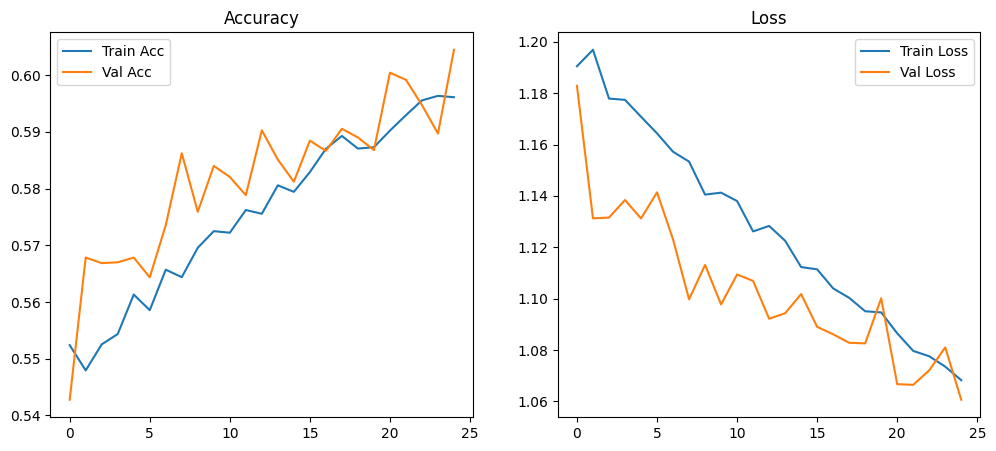

In [31]:
# STEP 7: Accuracy and loss plots
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

       angry       0.52      0.50      0.51       958
     disgust       0.72      0.16      0.26       111
        fear       0.44      0.32      0.37      1024
       happy       0.82      0.83      0.83      1774
     neutral       0.52      0.65      0.58      1233
         sad       0.48      0.49      0.48      1247
    surprise       0.73      0.76      0.75       831

    accuracy                           0.60      7178
   macro avg       0.60      0.53      0.54      7178
weighted avg       0.60      0.60      0.60      7178



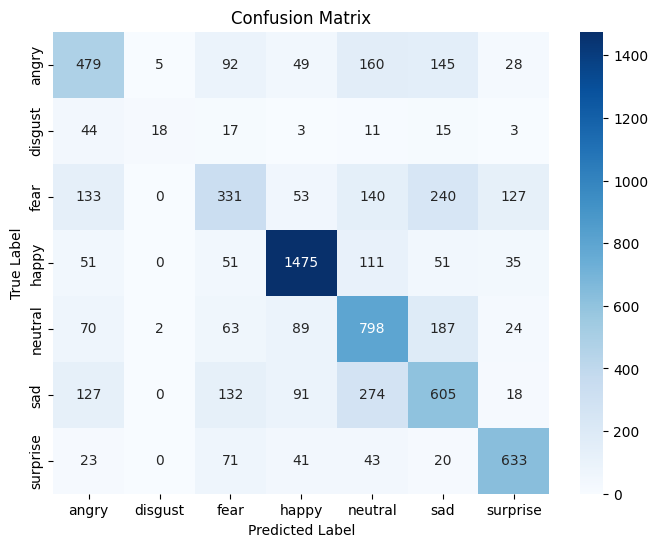

In [32]:

predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

labels = list(test_generator.class_indices.keys())


print(classification_report(y_true, y_pred, target_names=labels))


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [33]:
model.save("emotion_cnn_model.h5")
print("Model saved as emotion_cnn_model.h5")


Model saved as emotion_cnn_model.h5
